### Estatística descritiva
  
Usando:  
  - Pandas
  - Numpy
  - Matplotlib e Seaborn

In [1]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### O que é média?

Vamos supor que temos:

sequencia = {x1, x2, x3 .... xn}

<font size="5">\<x> = E[x] = media de x = $\frac{\sum_{i=1}^n{x_i}}{n}$</font>

### media de X = valor esperado de X

media = soma de todos os elementos dividido pelo número de elementos

### O que é desvio padrão (amostral)?

#### Por que desvio padrão é a soma das diferenças entre cada valor e a média ao quadrado?

<font size="5">SD[x] \= desvio padrão de x \= $\frac{\sum_{i=1}^n{ (x_i - <x>)^2 }}{n}$</font>

In [2]:
x = [2, 5, 8, 9, 11, 15, 17, 23]
x, len(x), np.mean(x), np.round(np.std(x), 2)

([2, 5, 8, 9, 11, 15, 17, 23], 8, 11.25, 6.38)

### Mediana

#### O valor que separa metade da amostra inferior e metade superior

#### Importante: quando a distriuição não é simétrica ou há dúvidas, use sempre a Mediana e não a Media

In [3]:
np.median(x), "é o valor entre 9 e 11"

(10.0, 'é o valor entre 9 e 11')

### Moda

#### é o valor mais alto de uma distribuição
#### uma distriuição pode ter múltiplas modas

In [4]:
MU = 20
SD = 2
N = 100

x = np.random.normal(MU, SD, N)
x[:10]

array([19.11748148, 19.2155859 , 21.1927358 , 18.51553303, 17.3375084 ,
       19.76502742, 18.45171923, 18.76680802, 19.96041544, 20.7616199 ])

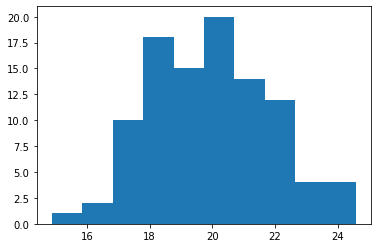

In [5]:
ret = plt.hist(x);

In [6]:
ret

(array([ 1.,  2., 10., 18., 15., 20., 14., 12.,  4.,  4.]),
 array([14.87600047, 15.84690115, 16.81780183, 17.7887025 , 18.75960318,
        19.73050385, 20.70140453, 21.67230521, 22.64320588, 23.61410656,
        24.58500724]),
 <BarContainer object of 10 artists>)

In [7]:
counts = ret[0]
vals   = ret[1]
vals   = [np.round((vals[i]+vals[i+1])/2, 1) for i in range(len(vals)-1)]
vals

[15.4, 16.3, 17.3, 18.3, 19.2, 20.2, 21.2, 22.2, 23.1, 24.1]

In [8]:
counts = [int(count) for count in counts]
counts

[1, 2, 10, 18, 15, 20, 14, 12, 4, 4]

In [9]:
len(vals), len(counts)

(10, 10)

In [10]:
vals = [ [vals[i]]*counts[i] for i in range(len(vals))]
vals[0:2]

[[15.4], [16.3, 16.3]]

In [11]:
vals = np.sum(vals)
vals[:10]

/media/flalix/5c1ba0b4-f897-451c-9068-ac5e57194590/flalix/anaconda3/envs/py_env37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[15.4, 16.3, 16.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3, 17.3]

In [12]:
from statistics import mode

mu = np.mean(x)
ssd = np.std(x)
med = np.median(x)
mod = mode(vals)

mu, ssd, med, mod

(19.906960176081668, 1.904156225874583, 19.88874950171645, 20.2)

Text(0.5, 1.0, 'Uma distribuição normal media=20 e sd=2 com 100 valores')

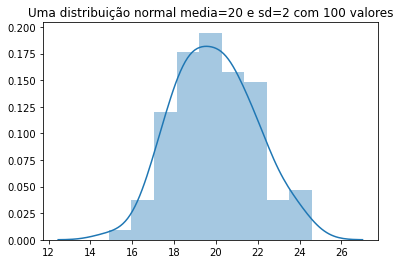

In [13]:
ax = sns.distplot(x)
ax.set_title("Uma distribuição normal media=%d e sd=%d com %d valores"%(MU, SD, N))

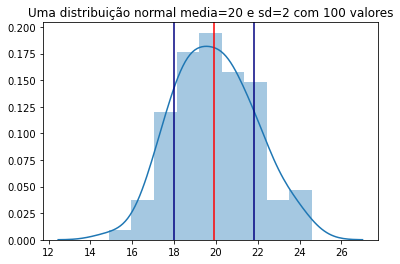

In [14]:
ax = sns.distplot(x)
ax.set_title("Uma distribuição normal media=%d e sd=%d com %d valores"%(MU, SD, N))
ax.axvline(mu, color='red')
ax.axvline(mu+ssd, color='navy')
ax.axvline(mu-ssd, color='navy')

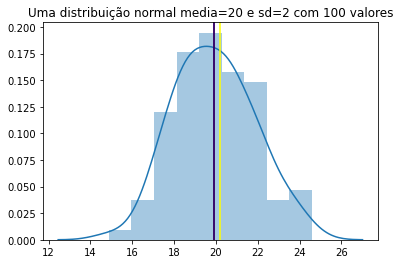

In [15]:
ax = sns.distplot(x)
ax.set_title("Uma distribuição normal media=%d e sd=%d com %d valores"%(MU, SD, N))
ax.axvline(mu, color='red')
ax.axvline(med, color='navy')
ax.axvline(mod, color='yellow')

(19.406960176081668, 20.406960176081668)

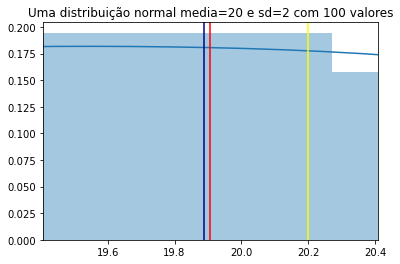

In [16]:
ax = sns.distplot(x)
ax.set_title("Uma distribuição normal media=%d e sd=%d com %d valores"%(MU, SD, N))
ax.axvline(mu, color='red')
ax.axvline(med, color='navy')
ax.axvline(mod, color='yellow')
ax.set_xlim(mu-0.5, mu+0.5)

### Vamos utilizar a tabela das cobras

In [17]:
root_data = '../data/'
filename = 'Snake Morphotaxonomy.xlsx'

fullpath = os.path.join(root_data, filename)

try:
    df = pd.read_excel(fullpath)
    print("Read '%s'"%fullpath)
except:
    print("Could not read '%s'"%fullpath)

Read '../data/Snake Morphotaxonomy.xlsx'


In [18]:
print(df.shape)
print(df.columns)
df.head(3)

(240, 9)
Index(['species', 'population', 'sex', 'RDS', 'VS', 'HL', 'TaL', 'temperature',
       'elevation'],
      dtype='object')


,species,population,sex,RDS,VS,HL,TaL,temperature,elevation
0,B_jararaca,RJ_serra,Female,23,144,25.0,34.0,20.3,894
1,B_jararaca,RJ_serra,Female,23,145,25.0,43.0,20.3,894
2,B_jararaca,RJ_serra,Female,23,144,17.0,18.0,23.2,173


### Média = valor esperado

In [19]:
mu = df.HL.mean()
sd = df.HL.std()
n  = df.HL.count()

mu, sd, n

(25.305375, 7.451745847570101, 240)

### Mas, lembre-se que há várias espécies

In [20]:
specList = df.species.unique()
specList

array(['B_jararaca', 'B_terrificus', 'B_new'], dtype=object)

In [21]:
df_jar = df[df.species == 'B_jararaca']

mu_jar = df_jar.HL.mean()
sd_jar = df_jar.HL.std()
n_jar  = df_jar.HL.count()

mu_jar, sd_jar, n_jar

(24.299065420560748, 8.213214103551309, 107)

In [22]:
df_ter = df[df.species == 'B_terrificus']

mu_ter = df_ter.HL.mean()
sd_ter = df_ter.HL.std()
n_ter  = df_ter.HL.count()

mu_ter, sd_ter, n_ter

(24.262403846153845, 6.24353280862784, 104)

### Porque a média (HL) geral é 25.30 e a média das espécies é menor?

### Porque o desvio padrão amostral (HL) geral é 7.45 e o SSD das espécies um é maior e outro é menor?

### Será porque esquecemos da terceira espécie?

In [23]:
df_new = df[df.species == 'B_new']

mu_new = df_new.HL.mean()
sd_new = df_new.HL.std()
n_new  = df_new.HL.count()

mu_new, sd_new, n_new

(32.758620689655174, 3.1242733145232933, 29)

### O que estes resultados significam ? Como compará-los

### Usando Pandas para calcular estatística descritiva

#### O Pandas tem uma função chamada groupby - aggregate

In [24]:
df.groupby('species')

### O pd.groupby cria um generator

  - agruando por especie
  - para cada especie imprimindo as primeiras 4 linhas, e 5 colunas (filtro via iloc)

In [25]:
for g, data in df.groupby('species'):
    print(g)
    print("\n",data.iloc[:4,:5],"\n\n")

B_jararaca

       species population     sex  RDS   VS
0  B_jararaca   RJ_serra  Female   23  144
1  B_jararaca   RJ_serra  Female   23  145
2  B_jararaca   RJ_serra  Female   23  144
3  B_jararaca   RJ_serra  Female   23  144 


B_new

     species population     sex  RDS   VS
211   B_new   Colombia  Female   25  143
212   B_new   Colombia  Female   23  145
213   B_new   Colombia  Female   23  143
214   B_new   Colombia  Female   25  144 


B_terrificus

           species   population     sex  RDS   VS
107  B_terrificus  SP_planalto  Female   27  154
108  B_terrificus  SP_planalto  Female   25  153
109  B_terrificus  SP_planalto  Female   25  155
110  B_terrificus  SP_planalto  Female   27  156 




### pd.groupby + aggregate

In [26]:
# média de todos os campos numéricos encontrados
df.groupby('species').agg('mean')

,RDS,VS,HL,TaL,temperature,elevation
species,,,,,,
B_jararaca,23.186916,138.878505,24.299065,35.556075,23.450467,391.532710
B_new,23.586207,145.448276,32.758621,49.655172,22.810345,1005.620690
B_terrificus,24.778846,156.057692,24.262404,42.217308,26.746154,138.259615


In [27]:
# pandas usa as funções do numpy
# repare que gera um cabeçalho de duas dimensões!
df.groupby('species').agg(['mean', 'median', 'std'])

RDS                           VS                   \
                   mean median       std        mean median       std   
species                                                                 
B_jararaca    23.186916     23  0.753994  138.878505    138  4.264178   
B_new         23.586207     23  0.907006  145.448276    145  2.733211   
B_terrificus  24.778846     25  1.060836  156.057692    156  4.384055   

                     HL                         TaL                    \
                   mean median       std       mean median        std   
species                                                                 
B_jararaca    24.299065   22.0  8.213214  35.556075   33.0  13.451928   
B_new         32.758621   32.0  3.124273  49.655172   50.0   6.154417   
B_terrificus  24.262404   25.0  6.243533  42.217308   46.5  12.706488   

             temperature                     elevation                     
                    mean median       std         mean median         std  
species                                                                    
B_jararaca     23.450467   24.6  3.017977   391.532710    173  441.581684  
B_new          22.810345   22.8  0.888958  1005.620690   1050  183.859887  
B_terrificus   26.746154   27.0  1.411184   138.259615     50  250.637013

### Calculando somente uma variável

In [28]:
df.groupby('species').HL.agg(['mean', 'median', 'std'])

,mean,median,std
species,,,
B_jararaca,24.299065,22.0,8.213214
B_new,32.758621,32.0,3.124273
B_terrificus,24.262404,25.0,6.243533


### e ainda há muito mais ...

### Faça o mesmo para populações